In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
df=pd.read_csv('cyberbullying_tweets.csv')


In [3]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [4]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


# Data preprocessing 

In [5]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [6]:
df.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,RT @sailorhg: the intro for my hardware hackin...,religion
freq,2,7998


In [7]:
df.shape

(47692, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [9]:
# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 36


In [10]:
# Explore the distribution of cyberbullying types
cyberbullying_distribution = df['cyberbullying_type'].value_counts()
print("\nDistribution of cyberbullying types:")
print(cyberbullying_distribution)


Distribution of cyberbullying types:
cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


# EDA

In [11]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                                               tweet_text cyberbullying_type
count                                               47692              47692
unique                                              46017                  6
top     RT @sailorhg: the intro for my hardware hackin...           religion
freq                                                    2               7998


###  distribution of cyberbullying types

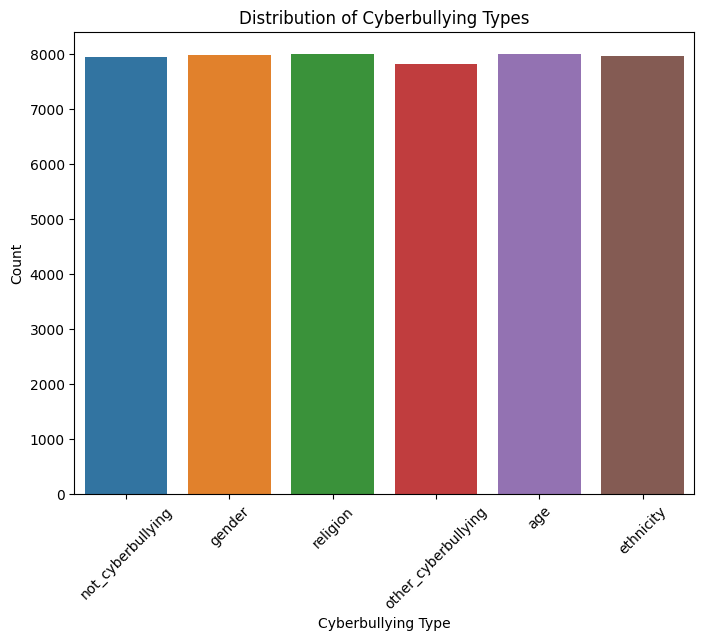

In [12]:
# Explore the distribution of cyberbullying types
plt.figure(figsize=(8, 6))
sns.countplot(x='cyberbullying_type', data=df)
plt.title("Distribution of Cyberbullying Types")
plt.xlabel("Cyberbullying Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### word cloud for cyberbullying tweets

In [13]:
from wordcloud import WordCloud

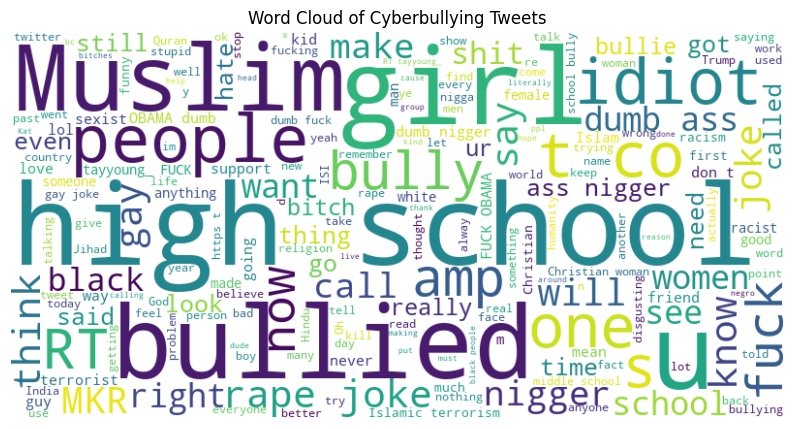

In [14]:
# Create a word cloud for cyberbullying tweets
all_tweets = ' '.join(df['tweet_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cyberbullying Tweets")
plt.show()

### Text Length Analysis

In [15]:
# Text Length Analysis
df['tweet_length'] = df['tweet_text'].apply(len)

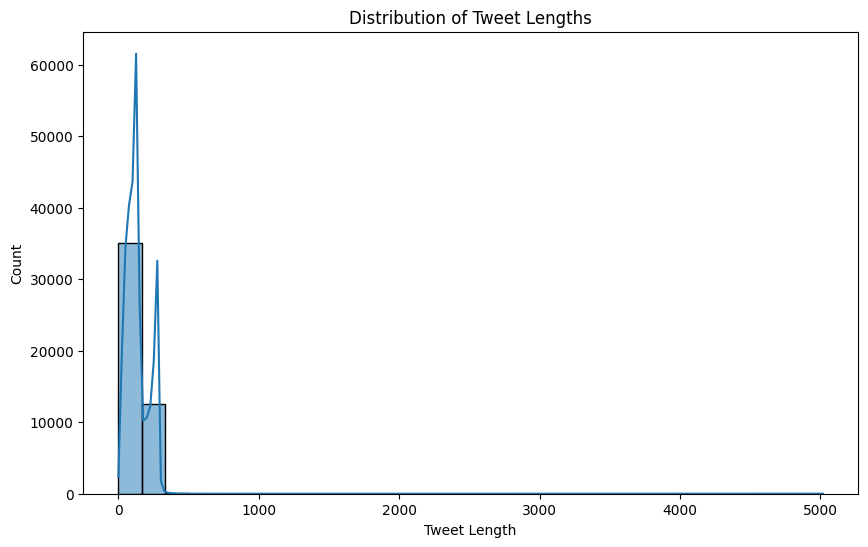

In [16]:

plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length")
plt.ylabel("Count")
plt.show()


### Sentiment Analysis Distribution

In [17]:
from textblob import TextBlob

Text(0, 0.5, 'Count')

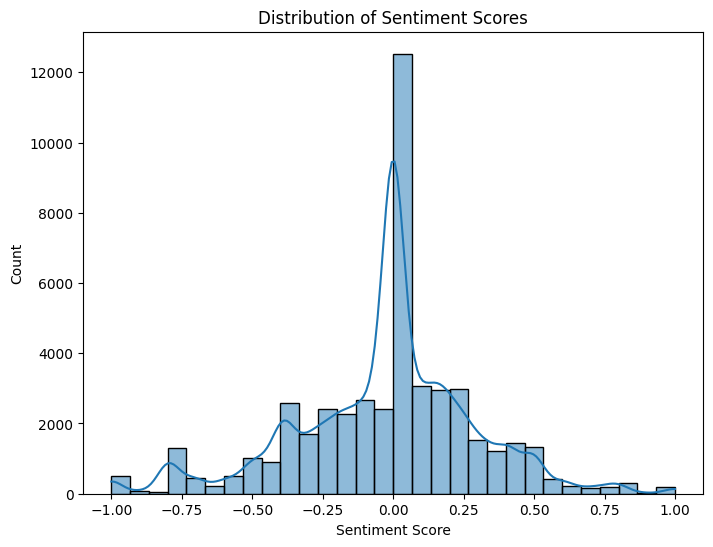

In [18]:
# Sentiment Analysis Distribution
df['sentiment'] = df['tweet_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")

### Top Words Analysis for Word Clouds

In [19]:
# Top Words Analysis for Word Clouds
def generate_wordcloud(cyberbullying_type):
    text = ' '.join(df[df['cyberbullying_type'] == cyberbullying_type]['tweet_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {cyberbullying_type}")
    plt.show()


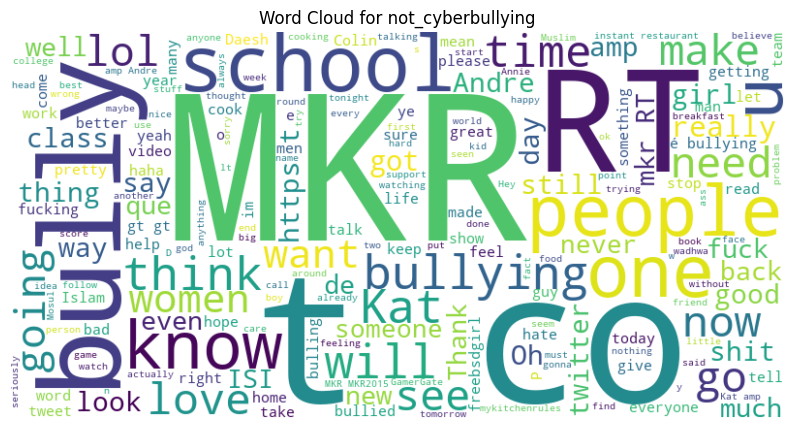

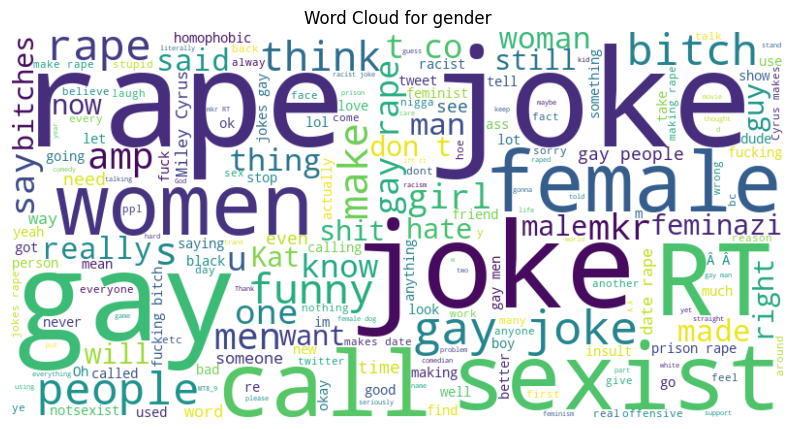

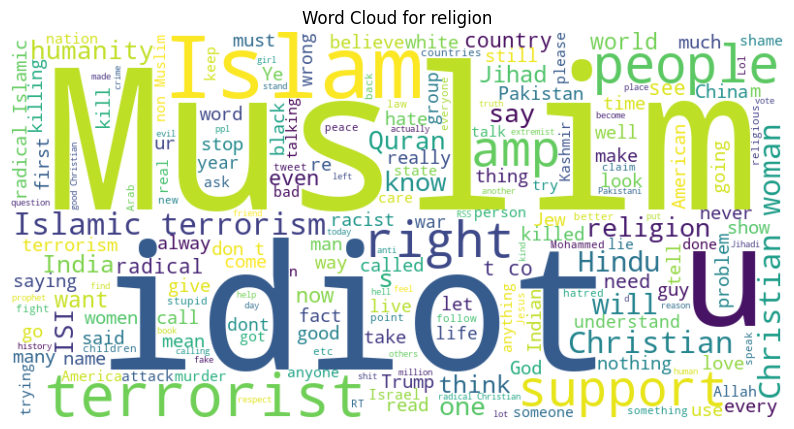

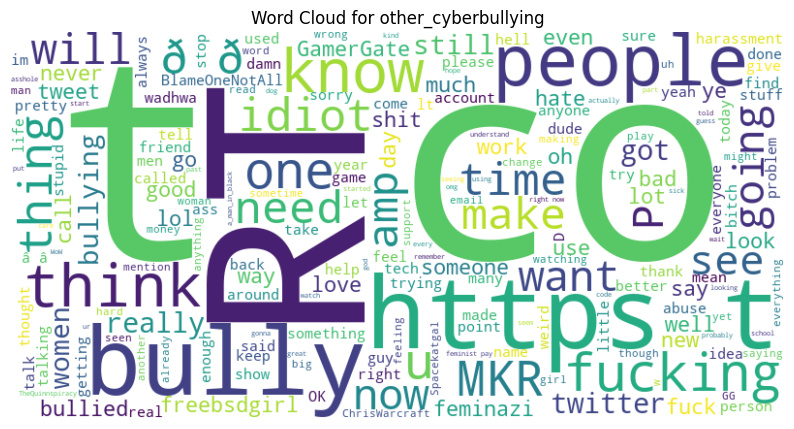

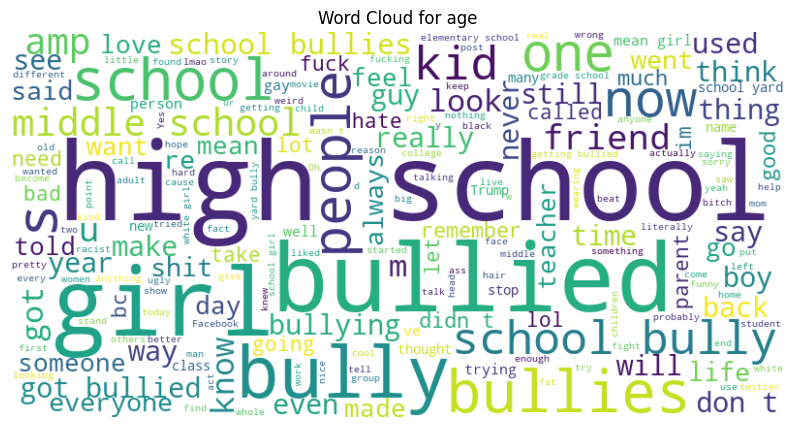

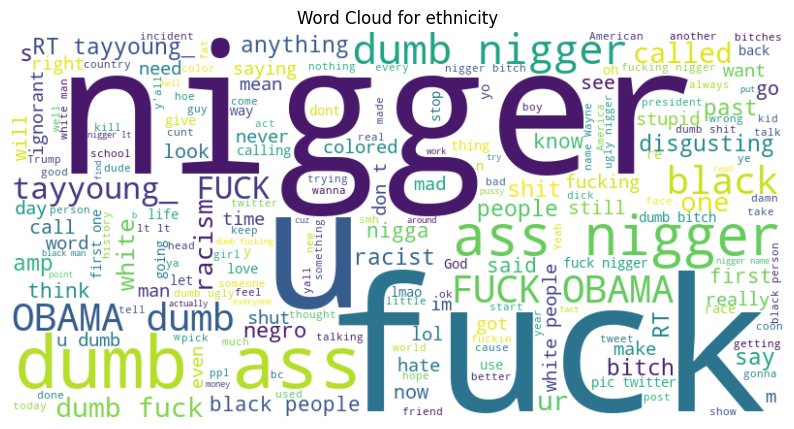

In [20]:
# Generate Word Clouds for each Cyberbullying Type
cyberbullying_types = df['cyberbullying_type'].unique()
for cyberbullying_type in cyberbullying_types:
    generate_wordcloud(cyberbullying_type)

# Sentiment analysis 

In [21]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import string

In [22]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import string

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')


# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Join the words back into a string
    text = ' '.join(filtered_words)
    
    return text

# Apply preprocessing to tweet_text column
df['cleaned_text'] = df['tweet_text'].apply(preprocess_text)

# Function to get sentiment label
def get_sentiment_label(sentiment_score):
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

# Function to analyze sentiment of text
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    sentiment_label = get_sentiment_label(sentiment_score)
    return sentiment_label

# Apply sentiment analysis to cleaned_text column
df['sentiment'] = df['cleaned_text'].apply(analyze_sentiment)

# Print the first few rows of the dataframe with sentiment labels
print(df[['tweet_text', 'sentiment']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SBMCODED\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SBMCODED\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                          tweet_text sentiment
0  In other words #katandandre, your food was cra...   neutral
1  Why is #aussietv so white? #MKR #theblock #ImA...   neutral
2  @XochitlSuckkks a classy whore? Or more red ve...  positive
3  @Jason_Gio meh. :P  thanks for the heads up, b...  negative
4  @RudhoeEnglish This is an ISIS account pretend...   neutral


# Comparative Study of Cyberbullying Types

In [23]:
from nltk.corpus import stopwords


Distribution of Cyberbullying Types:
cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

Sentiment Analysis by Cyberbullying Type:
sentiment            negative  neutral  positive
cyberbullying_type                              
age                      2461      795      4736
ethnicity                6256      295      1410
gender                   2106     1605      4262
not_cyberbullying        1665     3870      2410
other_cyberbullying      2419     3193      2211
religion                 4075     1532      2391


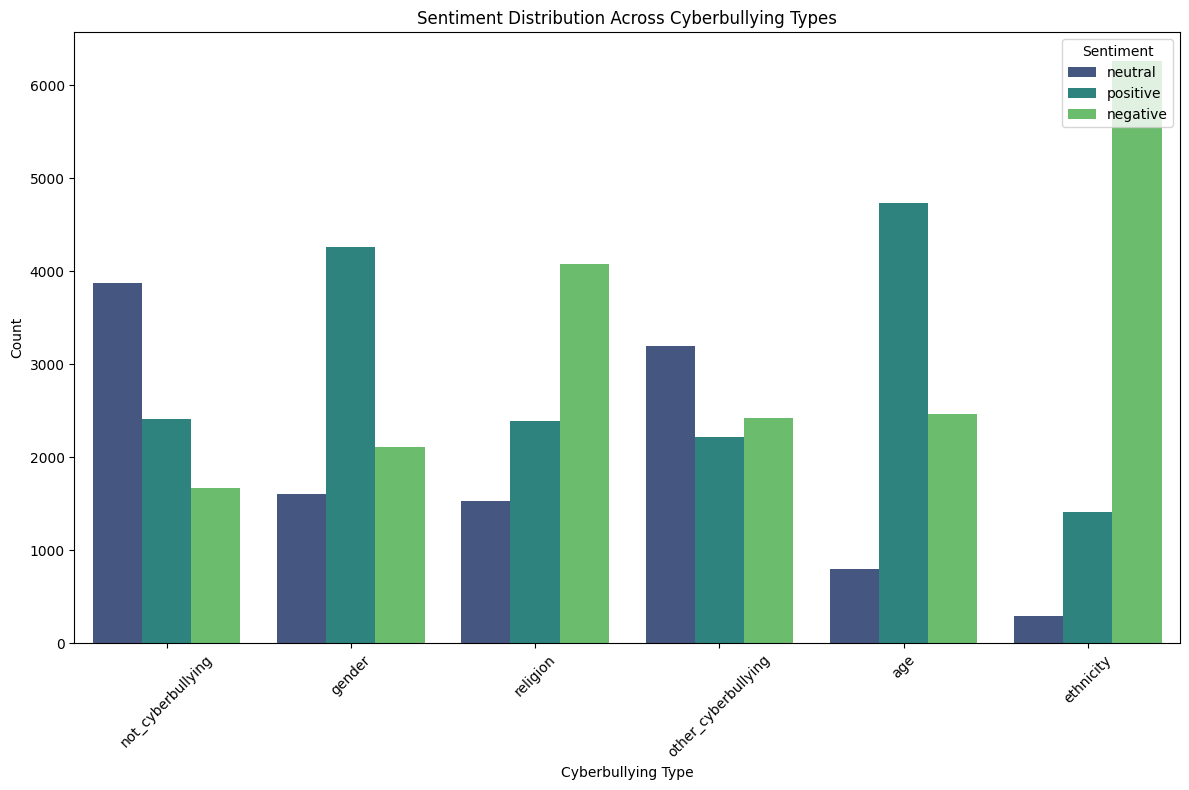

In [24]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Join the words back into a string
    text = ' '.join(filtered_words)
    
    return text

# Apply preprocessing to tweet_text column
df['cleaned_text'] = df['tweet_text'].apply(preprocess_text)

# Function to get sentiment label
def get_sentiment_label(sentiment_score):
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

# Function to analyze sentiment of text
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    sentiment_label = get_sentiment_label(sentiment_score)
    return sentiment_label

# Apply sentiment analysis to cleaned_text column and create sentiment column
df['sentiment'] = df['cleaned_text'].apply(analyze_sentiment)

# Investigate the distribution of cyberbullying types
cyberbullying_types = df['cyberbullying_type'].unique()
cyberbullying_distribution = df['cyberbullying_type'].value_counts()

print("Distribution of Cyberbullying Types:")
print(cyberbullying_distribution)

# Analyze sentiment for each cyberbullying type
sentiment_by_type = df.groupby(['cyberbullying_type', 'sentiment']).size().unstack(fill_value=0)

print("\nSentiment Analysis by Cyberbullying Type:")
print(sentiment_by_type)

# Plotting the sentiment distribution for each cyberbullying type
plt.figure(figsize=(12, 8))
sns.countplot(x='cyberbullying_type', hue='sentiment', data=df, palette='viridis')
plt.title("Sentiment Distribution Across Cyberbullying Types")
plt.xlabel("Cyberbullying Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()
plt.show()

# feature engineering 

In [25]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Join the words back into a string
    text = ' '.join(filtered_words)
    
    return text


In [27]:
# Apply preprocessing to tweet_text column
df['cleaned_text'] = df['tweet_text'].apply(preprocess_text)

# Calculate tweet length
df['tweet_length'] = df['tweet_text'].apply(len)

# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Convert TF-IDF features to a DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Count frequency of certain words
# Example: Count the frequency of the word 'cyberbullying'
df['cyberbullying_freq'] = df['cleaned_text'].apply(lambda x: x.split().count('cyberbullying'))

# Extract hashtags
# Example: Extract hashtags from the text
df['hashtags'] = df['tweet_text'].apply(lambda x: [word[1:] for word in x.split() if word.startswith('#')])

# Print the first few rows of the dataframe with the new features
print(df[['tweet_text', 'cleaned_text', 'tweet_length', 'cyberbullying_freq', 'hashtags']].head())
print("\nShape of TF-IDF Features DataFrame:", tfidf_df.shape)

                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                        cleaned_text  tweet_length  \
0            words katandandre food crapilicious mkr            61   
1  aussietv white mkr theblock imacelebrityau tod...           115   
2    xochitlsuckkks classy whore red velvet cupcakes            60   
3  jasongio meh p thanks heads concerned another ...           103   
4  rudhoeenglish isis account pretending kurdish ...           103   

   cyberbullying_freq                                           hashtags  
0                   0                                [katandandre,, mkr]  
1                   0  [aussietv, MKR, theblock, ImACelebrityAU, toda...  
2                

## model training and evaluation 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [29]:
# Create feature matrix X and target y
X = df['cleaned_text']
y = df['sentiment']


In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# TF-IDF Vectorizer for Logistic Regression and Naive Bayes
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [32]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)


C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)

In [34]:
# LSTM Model
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)

In [35]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

lstm_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_len),
    LSTM(units=64),
    Dense(3, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_pad, pd.get_dummies(y_train), epochs=5, batch_size=32, validation_split=0.1)




Epoch 1/5
1074/1074 [==============================] - 603s 558ms/step - loss: 1.0763 - accuracy: 0.3946 - val_loss: 1.0756 - val_accuracy: 0.4067
Epoch 2/5
1074/1074 [==============================] - 602s 561ms/step - loss: 1.0757 - accuracy: 0.3977 - val_loss: 1.0732 - val_accuracy: 0.4067
Epoch 3/5
1074/1074 [==============================] - 585s 545ms/step - loss: 1.0755 - accuracy: 0.3982 - val_loss: 1.0729 - val_accuracy: 0.4067
Epoch 4/5
1074/1074 [==============================] - 617s 574ms/step - loss: 1.0756 - accuracy: 0.3982 - val_loss: 1.0732 - val_accuracy: 0.4067
Epoch 5/5
1074/1074 [==============================] - 549s 511ms/step - loss: 1.0755 - accuracy: 0.3982 - val_loss: 1.0724 - val_accuracy: 0.4067


In [36]:
# Get probabilities for each class
lstm_probs = lstm_model.predict(X_test_pad)
# Choose the class with the highest probability for predictions
lstm_pred = np.argmax(lstm_probs, axis=1)


299/299 [==============================] - 34s 105ms/step


In [39]:
# Mapping predicted labels to numeric format
label_map_reverse = {0: 'positive', 1: 'negative', 2: 'neutral'}
lstm_pred_numeric = np.array([label_map_reverse[pred] for pred in lstm_pred])
lstm_accuracy, lstm_precision, lstm_recall, lstm_f1 = evaluate_model(y_test, lstm_pred_numeric)
# Mapping predicted labels to numeric format
label_map_reverse = {0: 'positive', 1: 'negative', 2: 'neutral'}
lstm_pred_numeric = np.array([label_map_reverse[pred] for pred in lstm_pred])

# Evaluate LSTM
lstm_accuracy, lstm_precision, lstm_recall, lstm_f1 = evaluate_model(y_test, lstm_pred_numeric)




C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### result for logistic regression 

In [40]:

# Print the evaluation results
print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)
print("\n")



Logistic Regression:
Accuracy: 0.8888772408009226
Precision: 0.8945751214680728
Recall: 0.8888772408009226
F1 Score: 0.8892505176369394




#### result for naive bayes 


In [41]:
print("Naive Bayes:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)
print("\n")



Naive Bayes:
Accuracy: 0.7372890240067093
Precision: 0.7400201868884823
Recall: 0.7372890240067093
F1 Score: 0.7312357400707216




#### result for LSTM 

In [42]:
print("LSTM:")
print("Accuracy:", lstm_accuracy)
print("Precision:", lstm_precision)
print("Recall:", lstm_recall)
print("F1 Score:", lstm_f1)


LSTM:
Accuracy: 0.3633504560226439
Precision: 0.13202355389186327
Recall: 0.3633504560226439
F1 Score: 0.1936751527219506


# comparative analysis 

In [43]:
# Create a DataFrame to store evaluation metrics
evaluation_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'LSTM'],
    'Accuracy': [lr_accuracy, nb_accuracy, lstm_accuracy],
    'Precision': [lr_precision, nb_precision, lstm_precision],
    'Recall': [lr_recall, nb_recall, lstm_recall],
    'F1 Score': [lr_f1, nb_f1, lstm_f1]
})

# Print the evaluation results
print("Sentiment Analysis Model Evaluation Results:")
print(evaluation_results)


Sentiment Analysis Model Evaluation Results:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.888877   0.894575  0.888877  0.889251
1          Naive Bayes  0.737289   0.740020  0.737289  0.731236
2                 LSTM  0.363350   0.132024  0.363350  0.193675


In [44]:
# Create a DataFrame for sentiment distribution
sentiment_distribution = df.groupby(['cyberbullying_type', 'sentiment']).size().unstack(fill_value=0)

# Print sentiment distribution
print("\nSentiment Distribution within Each Cyberbullying Type:")
print(sentiment_distribution)



Sentiment Distribution within Each Cyberbullying Type:
sentiment            negative  neutral  positive
cyberbullying_type                              
age                      2461      795      4736
ethnicity                6256      295      1410
gender                   2106     1605      4262
not_cyberbullying        1665     3870      2410
other_cyberbullying      2419     3193      2211
religion                 4075     1532      2391


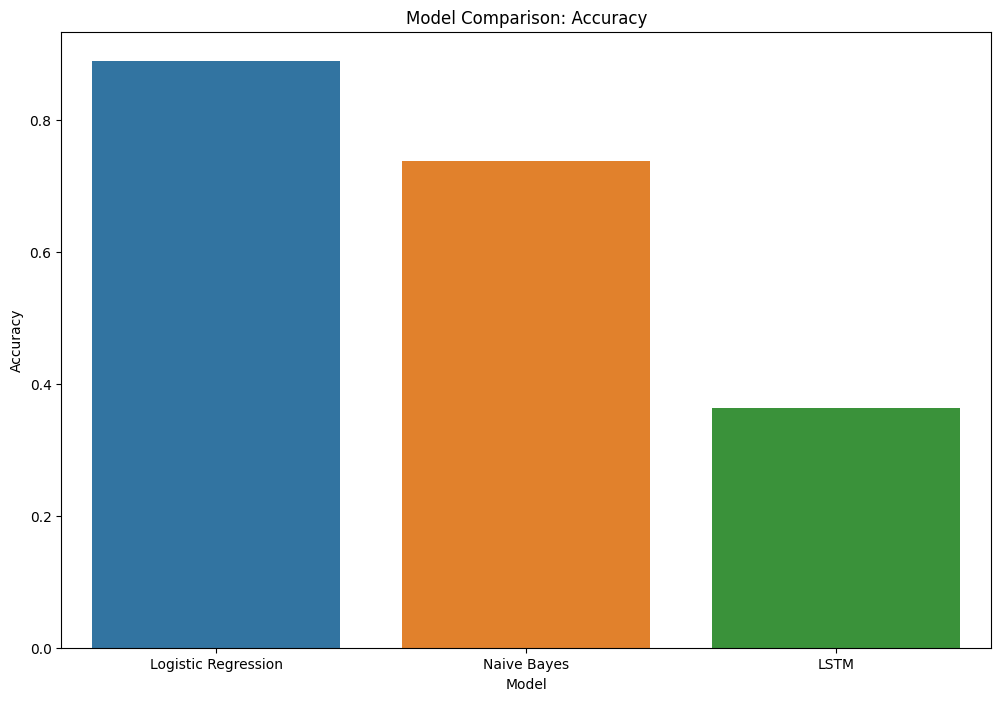

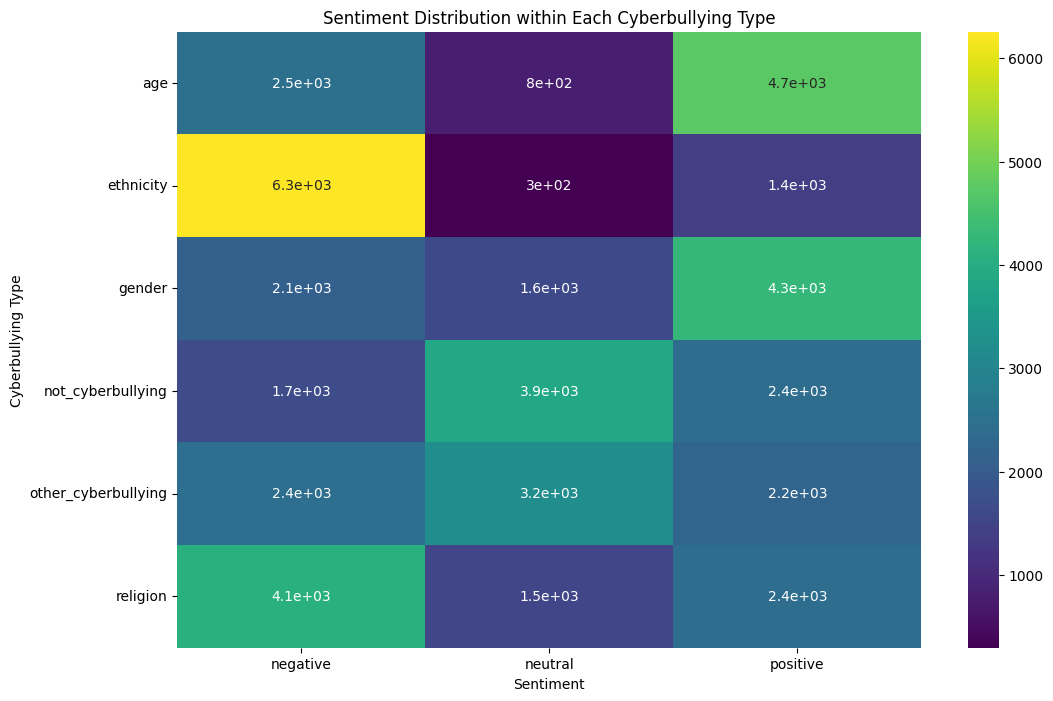

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for model comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy', data=evaluation_results)
plt.title('Model Comparison: Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Create a heatmap for sentiment distribution
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_distribution, annot=True, cmap='viridis')
plt.title('Sentiment Distribution within Each Cyberbullying Type')
plt.xlabel('Sentiment')
plt.ylabel('Cyberbullying Type')
plt.show()
